In [14]:
import pandas as pd

In [15]:
data=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [16]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
data.shape

(500, 9)

In [19]:
from sklearn.preprocessing import Binarizer
b = Binarizer(threshold=0.75)
data['Chance of Admit '] = b.fit_transform(data[['Chance of Admit ']])

In [20]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [21]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit '] 

In [22]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [23]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [24]:
y = y.astype(int)

In [25]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int64

In [26]:
import seaborn as sns

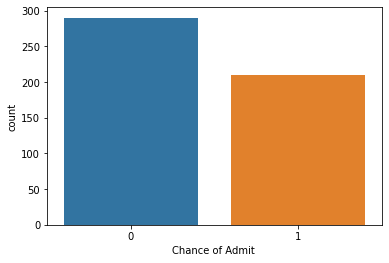

In [27]:
sns.countplot(x=y);

In [28]:
y.value_counts()

0    290
1    210
Name: Chance of Admit , dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0,test_size=0.25)

In [30]:
x_train.shape

(375, 8)

In [31]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(random_state=0)
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_pred = Classifier.predict(x_test)

In [33]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted':y_pred
})

In [34]:
result

,actual,predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

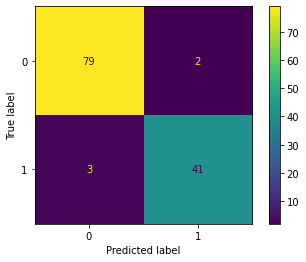

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
accuracy_score(y_test,y_pred)

0.96

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.95      0.93      0.94        44

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



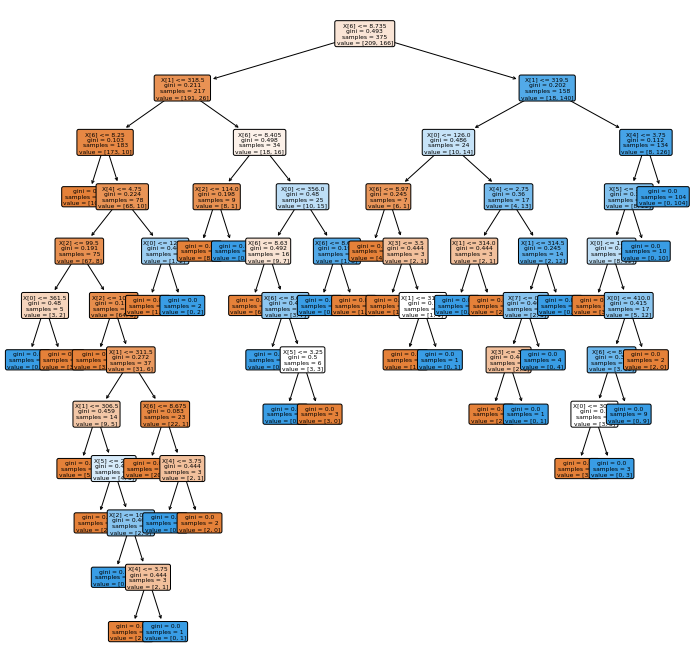

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(Classifier, fontsize=6,filled=True,rounded=True);